# Hipótesis
- Nula: No hay diferencia significativa en el volumen de tráfico entre el tráfico orgánico y el tráfico pagado.
- Alternativa: Existe una diferencia significativa en el volumen de tráfico entre el tráfico orgánico y el tráfico pagado.

In [15]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Para pruebas estadísticas
# -----------------------------------------------------------------------
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest # para hacer el ztest
import statistics as st 
from scipy.stats import skew,kurtosis # libreria para asimetria y curtosis 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../")
from src.soporte_abtesting import(
    exploracion_dataframe,
    Asunciones,
    Pruebas_parametricas,
    elegir_test
)

In [16]:
df = pd.read_csv("../datos/08_trafico.csv",index_col=0)
df.sample()

,fecha,Organic Traffic,Paid Traffic
706,2024-10-14,6727,368


In [17]:
df = pd.melt(df, id_vars=["fecha"], value_vars=["Organic Traffic", "Paid Traffic"],
                          var_name="grupo", value_name="métrica")
df.sample()

,fecha,grupo,métrica
526,2024-04-17,Organic Traffic,5439


In [18]:
exploracion_dataframe(df,"grupo")

El número de datos es 1460 y el de columnas es 3

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
fecha,object
grupo,object
métrica,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna FECHA tiene las siguientes valore únicos:


,count
fecha,
2024-11-06,2
2022-11-08,2
2022-11-09,2
2022-11-10,2
2022-11-11,2


La columna GRUPO tiene las siguientes valore únicos:


,count
grupo,
Organic Traffic,730
Paid Traffic,730



 ..................... 

Los principales estadísticos de las columnas categóricas para el ORGANIC TRAFFIC son: 


,count,unique,top,freq
fecha,730,730,2024-11-06,1
grupo,730,1,Organic Traffic,730



 ..................... 

Los principales estadísticos de las columnas numéricas para el ORGANIC TRAFFIC son: 


,count,mean,std,min,25%,50%,75%,max
métrica,730.0,5662.99863,901.200112,2744.0,4992.0,5484.5,6185.0,10558.0



 ..................... 

Los principales estadísticos de las columnas categóricas para el PAID TRAFFIC son: 


,count,unique,top,freq
fecha,730,730,2024-11-06,1
grupo,730,1,Paid Traffic,730



 ..................... 

Los principales estadísticos de las columnas numéricas para el PAID TRAFFIC son: 


,count,mean,std,min,25%,50%,75%,max
métrica,730.0,196.023288,146.434171,0.0,57.0,202.0,261.0,605.0


In [19]:
df.sample()

,fecha,grupo,métrica
263,2023-07-29,Organic Traffic,4860


# Visitas por grupo

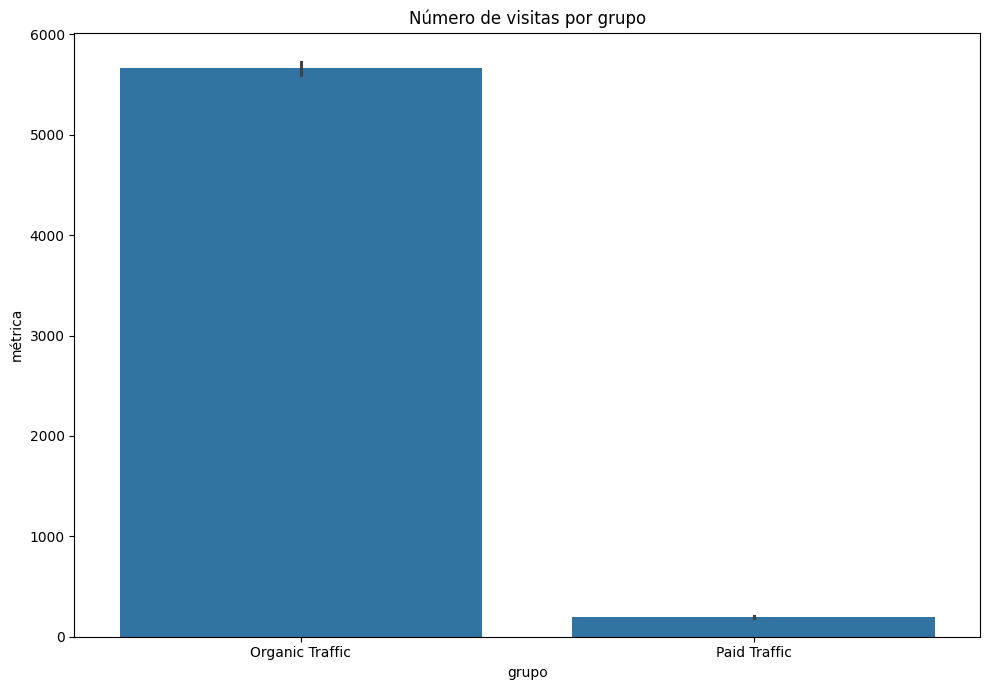

In [22]:
plt.figure(figsize=(10,7))
sns.barplot(x="grupo",y="métrica",data=df)
plt.title("Número de visitas por grupo")
plt.tight_layout()

# Distribución

C:\Users\ruipe\AppData\Local\Temp\ipykernel_23600\732630469.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


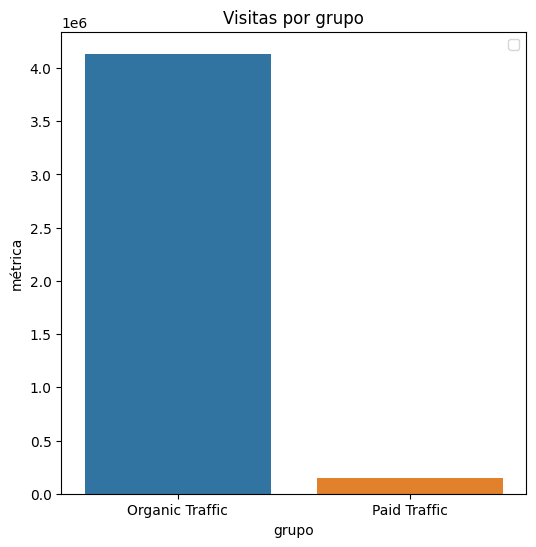

In [ ]:
datos = df.groupby("grupo")["métrica"].sum().reset_index()
plt.figure(figsize=(6,6))
sns.barplot(x="grupo",y="métrica",hue="grupo",data=datos)
plt.title("Visitas por grupo")

# Normalidad

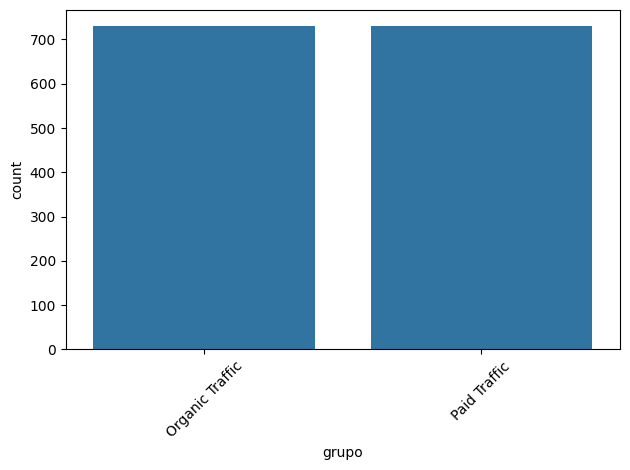

In [27]:
sns.countplot(x="grupo",data= df)
plt.xticks(rotation=45)
plt.tight_layout()

Misma cantidad de muestras

# Simetría

In [28]:
for grupo in df["grupo"].unique():
    df_grupo = df[df["grupo"] == grupo]
    skewness = df_grupo["métrica"].skew()
    print(f"Asimetría en {grupo}: {skewness}")

Asimetría en Organic Traffic: 1.320717854084861
Asimetría en Paid Traffic: 0.5296381278757578


Asimetrías con sesgo a la derecha

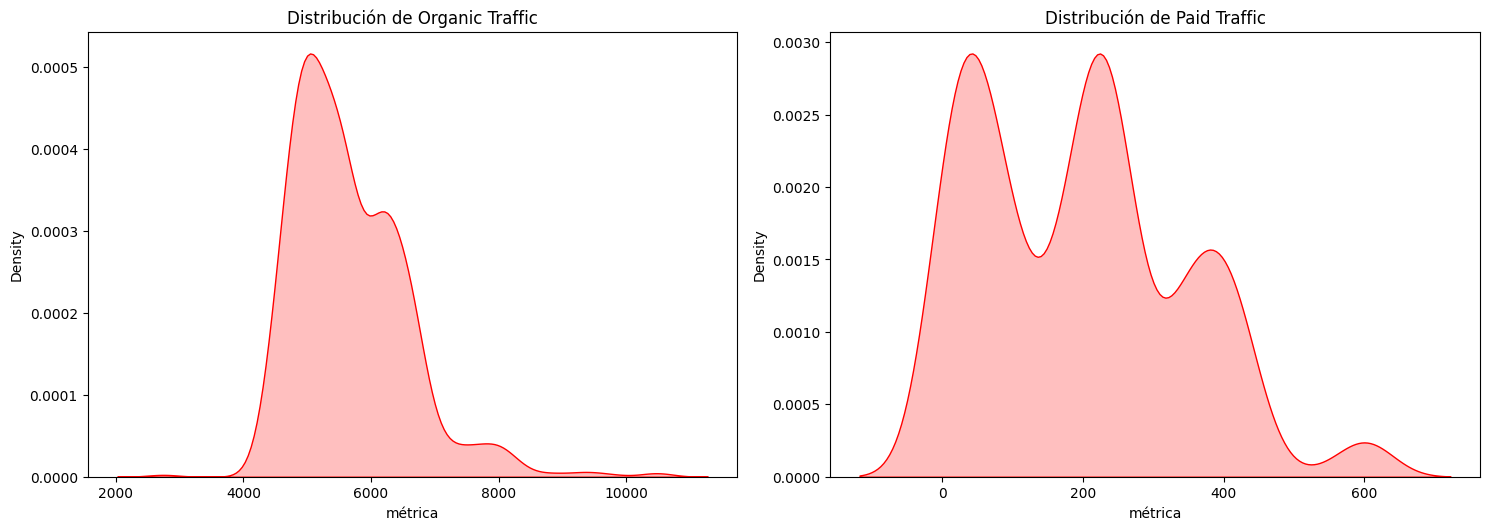

In [34]:
lista_g = df["grupo"].unique().tolist()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flat

for indice, g in enumerate(lista_g):
    sns.kdeplot(x="métrica", data=df[df["grupo"] == g], ax=axes[indice], fill=True, color="red")
    axes[indice].set_title(f"Distribución de {g}")

fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
plt.tight_layout()
plt.show()

In [35]:
for g in df["grupo"].unique():
    operations = Asunciones(df[df["grupo"]==g],"métrica")
    kolmorogov = operations.identificar_normalidad_analitica(metodo="kolmogorov")

Para la columna métrica, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
Para la columna métrica, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.


### No es normal, por lo que es No Paramétrica


In [36]:
elegir_test(df,"grupo","métrica",dependencia=False)

Es independiente, haciendo test Mann-Whitney
MannwhitneyuResult(statistic=np.float64(532900.0), pvalue=np.float64(5.741911457459384e-240))
Hay una diferencia significativa entre los datos


# Conclusiones
Tras Analizarlo podemos no aceptar H0 por faltas de evidencias de la misma